[10, 10]is 0
[11, 11]is 0
[12, 12]is 0
[13, 13]is 0
[14, 14]is 0
[15, 15]is 0
[16, 16]is 0
[17, 17]is 0
[18, 18]is 0
[19, 19]is 0
[20, 20]is 0
[21, 21]is 0
[22, 22]is 0
[23, 23]is 1
[24, 24]is 1
[25, 25]is 1
[26, 26]is 1
[27, 27]is 1
[28, 28]is 1
[29, 29]is 1
[30, 30]is 1
[31, 31]is 1
[32, 32]is 1
[33, 33]is 1
[34, 34]is 1
[35, 35]is 1
[36, 36]is 1
[37, 37]is 1
[38, 38]is 1
[39, 39]is 1


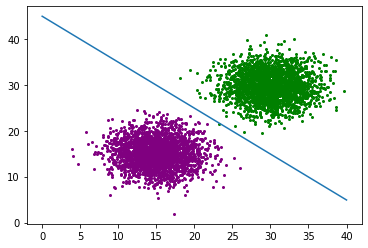

In [4]:
import numpy as np
import random
import matplotlib.pyplot as plt


def load_data(gauss_1, gauss_2, point_num):
    """
    数据输入
    :param gauss_1: 类别0的μ和σ组成的数组
    :param gauss_2: 类别1的μ和σ组成的数组
    :param point_num: 样本总数
    :return: x_0,y_0 二维高斯分布样本点(x_0,y_0)
             x_1,y_1 二维高斯分布样本点(x_1,y_1)
             label 类别标签
    """
    x_0 = []
    x_1 = []
    y_0 = []
    y_1 = []
    label = []
    while len(label) < point_num:
        if random.random() > 0.5:
            x_0.append(random.gauss(gauss_1[0], gauss_1[1]))
            y_0.append(random.gauss(gauss_1[0], gauss_1[1]))
            label.append(0)
        else:
            x_1.append(random.gauss(gauss_2[0], gauss_2[1]))
            y_1.append(random.gauss(gauss_2[0], gauss_2[1]))
            label.append(1)
    return x_0, y_0, x_1, y_1, label


def train(x_train_0, x_train_1, label):
    """
    训练高斯判别分析模型
    :param x_train_0: 类别为0的样本
    :param x_train_1: 类别为1的样本
    :param label: 样本标签
    :return: phi: Φ
             mu_0: μ_0
             mu_1: μ_1
             sigma: Σ
    """
    m = len(label)
    label_cnt_0 = float(label.count(0))
    label_cnt_1 = float(label.count(1))
    phi = label_cnt_1 / m
    mu_0 = np.sum(x_train_0[0])/label_cnt_0, np.sum(x_train_0[1])/label_cnt_0
    mu_1 = np.sum(x_train_1[0])/label_cnt_1, np.sum(x_train_1[1])/label_cnt_1
    x0_u0 = np.mat(x_train_0.T - mu_0)
    x1_u1 = np.mat(x_train_1.T - mu_1)
    x_u = np.mat(np.concatenate([x0_u0, x1_u1]))
    sigma = (1.0 / m) * (x_u.T * x_u)
    '''
    print(phi)
    print(mu_0)
    print(mu_1)
    print(sigma_0)
    print(sigma_1)
    '''
    return phi, np.mat(mu_0), np.mat(mu_1), sigma


def predict(x, gauss):
    """
    预测数据
    :param x: 输入的预测样本
    :param gauss: 得到的高斯模型的数组
    :return: p_y0 类别为0的概率
             p_y1 类别为1的概率
    """
    p_y0 = (1-gauss[0]) * np.exp(-1/2 * (x-gauss[1]) * gauss[3].I * (x-gauss[1]).T)
    p_y1 = (gauss[0]) * np.exp(-1/2 * (x-gauss[2]) * gauss[3].I * (x-gauss[2]).T)
    if p_y1 > p_y0:
        print(str(x) + "is 1")
    else:
        print(str(x) + "is 0")
    return p_y0, p_y1


if __name__ == '__main__':
    x_0, y_0, x_1, y_1, label = load_data([15, 3], [30, 3], 5000)
    train_0 = np.vstack((x_0, y_0))
    train_1 = np.vstack((x_1, y_1))
    gauss = train(train_0, train_1, label)
    for i in range(10,40):
        pre_x = [i, i]
        p_0, p_1 =predict(pre_x, gauss)
    # 绘制训练样本点
    plt.scatter(x_0, y_0, 4, "purple")
    plt.scatter(x_1, y_1, 4, "green")
    # 绘制分隔曲线(取样本中心点连线的中垂线)
    x_point = []
    y_point = []
    x0 = ((gauss[2] + gauss[1]) /2).T
    # 直线的斜率
    tmp = (gauss[2] -gauss[1]).T
    k = float(- tmp[0] / tmp[1])
    for i in np.linspace(0, 40, 100):
        x_point.append(i)
        y_point.append(k*i - k*float(x0[0])+float(x0[1]))
    plt.plot(x_point, y_point)
    plt.show()
